## Tensorflow training
* set up BNN by Tensorflow
* Create a function f(x,z) = 13*xs + 7*zs - 12
* Using L2-Norm objective function or huber_loss and gradient decent to minimize weight and bias for correct w and b

In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
#creating data
observation = 1000
xs = np.random.uniform(-10,10,(observation,1))
zs = np.random.uniform(-10,10,(observation,1))
noise = np.random.uniform(-0.1,0.1,(observation,1))
generated_input = np.column_stack((xs,zs))
#set target
generated_target = targets = 13*xs + 7*zs -12 + noise
#creating npz file
np.savez('TF_BNN', inputs = generated_input, targets = generated_target)

#set the size of input and output 
input_size = 2
output_size = 1

# set placeholder
inputs = tf.placeholder(tf.float32,[None,input_size])
targets = tf.placeholder(tf.float32,[None,output_size])

#set variable
w = tf.Variable(tf.random_uniform([input_size,output_size],minval=-0.1,maxval=0.1))
b = tf.Variable(tf.random_uniform([output_size],minval=-0.1,maxval=0.1))

#set output
outputs = tf.matmul(inputs,w) + b

# setup loss function (L2-Norm objective function and huber_loss)
L2_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs)
Huber_loss = tf.losses.huber_loss(labels=targets, predictions=outputs)

#setup optimization method (Gradient descent)
optimizer_L2 = tf.train.GradientDescentOptimizer(learning_rate = 0.02).minimize(L2_loss)
optimizer_huber = tf.train.GradientDescentOptimizer(learning_rate = 0.02).minimize(Huber_loss)

#session
sess = tf.InteractiveSession()

#Initialize variable

initializer = tf.global_variables_initializer()
sess.run(initializer)

In [3]:
# loading train data
training_data = np.load('TF_BNN.npz',)

In [4]:
# Training model(L2-norm)
times = 100
for e in range(times):
    _,curr_loss1 = sess.run([optimizer_L2,L2_loss], 
                            feed_dict={inputs:training_data['inputs'],targets:training_data['targets']})
    print(curr_loss1)

7407.534
879.18994
199.41637
118.77876
102.359795
93.57127
86.18349
79.454124
73.25905
67.54806
62.28243
57.427303
52.950672
48.823048
45.0172
41.508022
38.272408
35.28905
32.538258
30.001919
27.663311
25.507011
23.51881
21.685625
19.99532
18.43679
16.999767
15.674783
14.453066
13.326605
12.287957
11.330286
10.447263
9.633089
8.882379
8.190195
7.551976
6.96351
6.4209113
5.920609
5.459318
5.0339885
4.641812
4.28021
3.9467978
3.6393774
3.3559256
3.0945675
2.8535864
2.6313848
2.4265118
2.2376142
2.0634353
1.9028422
1.7547604
1.6182257
1.4923369
1.3762573
1.2692311
1.170546
1.079556
0.99565846
0.91830087
0.8469744
0.7812116
0.72057164
0.6646587
0.6131068
0.5655711
0.5217408
0.48132956
0.44406864
0.40971258
0.37803495
0.34882692
0.32189488
0.29706162
0.2741676
0.25305483
0.23358959
0.21564204
0.19909301
0.18383358
0.16976635
0.15679272
0.14483267
0.13380402
0.123635165
0.114258096
0.105612494
0.09764178
0.09029259
0.08351425
0.07726598
0.07150576
0.066193305
0.06129505
0.056778852
0.0526142

In [5]:
# Training model(Huber-norm)
# times = 100
# for e in range(times):
#     _,curr_loss2 = sess.run([optimizer_huber,Huber_loss], feed_dict = {inputs:training_data['inputs'],targets:training_data['targets']})
#     print(curr_loss2)

Text(0, 0.5, 'targets')

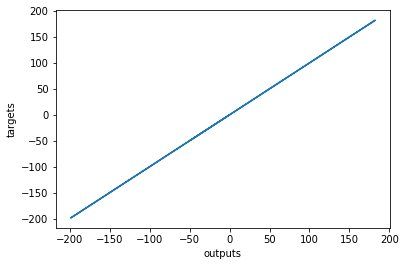

In [7]:
#Visualization data
out = sess.run([outputs], feed_dict = {inputs:training_data['inputs']})
x = np.squeeze(out)
y = np.squeeze(training_data['targets'])
plt.plot(x,y)
plt.xlabel('outputs')
plt.ylabel('targets')